This "Part 1" of the Challenge corresponds to the descriptive statistics part.

# Data Loading and Initial Analysis

In [359]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

In [360]:
# Loading the data
df = pd.read_excel('Households data.xlsx')

In [361]:
df.head()

,Hogar,EXCLUIR,paraValidacion,Sector,DirCoordX,DirCoordY,MontoArr,IngresoHogar,Factor,AnosEstudio,...,Acc_Habitacion_tpte_pub,Acc_Industria_tpte_pub,Acc_Servicios_tpte_pub,Acc_Comercio_auto,Acc_Educacion_auto,Acc_Habitacion_auto,Acc_Industria_auto,Acc_Servicios_auto,CLUSTER7,CLUSTER2
0,100010,0,0,7,335180.8019,6266420.975,100000,450845,136.393738,11,...,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
1,100020,0,0,7,338410.2114,6265607.141,120000,1019369,73.843597,11,...,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
2,100030,0,0,7,327863.8248,6257800.086,70000,80000,180.722809,10,...,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
3,100041,0,0,7,327864.0000,6257800.000,80000,559259,150.379059,14,...,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
4,100052,0,0,7,338480.8152,6267296.941,117771,710309,122.001518,12,...,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1


# Data Preparation

An initial analysis of the dictionary present in the spreadsheet already provides us with the opportunity to clean up the database, deleting the following attributes: "Hogar" (initial IDs); "EXCLUIR" (the file itself says this should not be used for the estimation); "paraValidacion" (no clear meaning, only binary, maybe used by the creators of this DB); "CLUSTER7" (no meaning a priori, must have been used by creators); "CLUSTER2" (same reasons as the latter).

In [362]:
f1 = df.drop(columns=['Hogar', 'EXCLUIR','paraValidacion','CLUSTER7','CLUSTER2'])
f1.columns

Index(['Sector', 'DirCoordX', 'DirCoordY', 'MontoArr', 'IngresoHogar',
       'Factor', 'AnosEstudio', 'CLASE', 'Sup_Prom_Constr_Hab_EOD',
       'Calid_EOD_norm_inv', 'DensConstr_EOD', 'Dist_est_Metro_MC_KM',
       'Dist_salida_Autop_MC_KM', 'Tiempo_Com_Stgo',
       'Ingreso_Promedio_Zona_MM', 'Acc_Comercio_tpte_pub',
       'Acc_Educacion_tpte_pub', 'Acc_Habitacion_tpte_pub',
       'Acc_Industria_tpte_pub', 'Acc_Servicios_tpte_pub', 'Acc_Comercio_auto',
       'Acc_Educacion_auto', 'Acc_Habitacion_auto', 'Acc_Industria_auto',
       'Acc_Servicios_auto'],
      dtype='object')

Now the minimum and maximum values for each attribute can be checked to see if there is any that doesn't make sense (e.g., negative values for years of study, etc.).

In [363]:
f1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sector,18264.0,3.821288e+00,1.947325,1.000000e+00,2.000000e+00,4.000000e+00,6.000000e+00,7.000000e+00
DirCoordX,18264.0,3.445885e+05,10168.072922,2.849616e+05,3.393443e+05,3.459730e+05,3.516341e+05,3.802550e+05
DirCoordY,18264.0,6.292533e+06,10757.231637,6.257255e+06,6.284990e+06,6.293280e+06,6.299760e+06,6.327817e+06
MontoArr,18264.0,1.915436e+05,164239.243206,1.000000e+04,1.136745e+05,1.500000e+05,2.000000e+05,5.000000e+06
IngresoHogar,18264.0,6.882743e+05,728777.706477,0.000000e+00,3.000000e+05,5.078265e+05,8.411012e+05,1.480000e+07
Factor,18264.0,1.123144e+02,74.540944,5.151379e+00,6.799954e+01,9.445776e+01,1.335874e+02,9.271428e+02
AnosEstudio,18264.0,9.776555e+00,16.400822,-9.900000e+01,1.000000e+01,1.200000e+01,1.400000e+01,2.400000e+01
CLASE,18264.0,-3.211235e-01,14.556300,-9.900000e+01,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00
Sup_Prom_Constr_Hab_EOD,18264.0,5.035286e+01,23.019691,0.000000e+00,3.910000e+01,4.580000e+01,5.800000e+01,2.073000e+02
Calid_EOD_norm_inv,18264.0,6.409177e-01,0.353851,0.000000e+00,3.600000e-01,7.800000e-01,9.800000e-01,1.000000e+00


Quite a few, so let's be smarter on how to check that:

In [364]:
f1.columns[(f1 < 0).any()].tolist()

['AnosEstudio',
 'CLASE',
 'Tiempo_Com_Stgo',
 'Acc_Comercio_tpte_pub',
 'Acc_Educacion_tpte_pub',
 'Acc_Habitacion_tpte_pub',
 'Acc_Industria_tpte_pub',
 'Acc_Servicios_tpte_pub',
 'Acc_Comercio_auto',
 'Acc_Educacion_auto',
 'Acc_Habitacion_auto',
 'Acc_Industria_auto',
 'Acc_Servicios_auto']

Let's start tackling the following attributes which we already understand the meaning of the number, and might represent simply missing data: "AnosEstudio"; "CLASE"; "Tiemp_Com_Stgo". To make sure of the impact on the size of our database, let's check how many observations would have to be excluded from the latter:

In [365]:
Study = len(f1[f1['AnosEstudio'] < 0])
Class = len(f1[f1['CLASE'] < 0])
Time = len(f1[f1['Tiempo_Com_Stgo'] < 0])

print('Study:', Study)
print('Class:', Class)
print('Time:', Time)

# Checking if there is any overlap between them, i.e., how many would we be actually deleting:
print('Study + Class:', Study & Class)
print('Study + Class + Time:', Study & Class & Time)
print('Class + Time:', Class & Time)
print('Study + Time:', Study & Time)
print('% to delete from DB', (Study+Time)/len(f1))

Study: 388
Class: 388
Time: 4
Study + Class: 388
Study + Class + Time: 4
Class + Time: 4
Study + Time: 4
% to delete from DB 0.02146298729741568


So now we are sure that we would have to delete a small percentage of our DB, so let's go ahead and do that:

In [366]:
print(len(f1))
f2 = f1[f1.AnosEstudio > 0]
f2 = f2[f2.Tiempo_Com_Stgo > 0]
print(len(f2))

18264
17614


While inspecting the spreadsheet, all of the "Acc" attributes also had negative values at -99 and only -99, which might indicate they are also not representative. So, let's do the same exercise we did the last time and check the impact of deleting those observations:

In [367]:
cols_to_check = f2.columns[(f2 < 0).any()].tolist()

for cols in cols_to_check:
    print(len(f2[f2[cols] < 0]))

31
31
31
31
31
31
31
31
31
31


Again, recurrent numbers increases the chances of 100% overlap which, while inspecting the spreadsheet, becomes evident. With only 31 observations to delete, let's go ahead and remove them too.

In [368]:
for cols in cols_to_check:
    f3 = f2[f2[cols] > 0]
len(f3)
f3.head()

,Sector,DirCoordX,DirCoordY,MontoArr,IngresoHogar,Factor,AnosEstudio,CLASE,Sup_Prom_Constr_Hab_EOD,Calid_EOD_norm_inv,...,Acc_Comercio_tpte_pub,Acc_Educacion_tpte_pub,Acc_Habitacion_tpte_pub,Acc_Industria_tpte_pub,Acc_Servicios_tpte_pub,Acc_Comercio_auto,Acc_Educacion_auto,Acc_Habitacion_auto,Acc_Industria_auto,Acc_Servicios_auto
0,7,335180.8019,6266420.975,100000,450845,136.393738,11,1,53.8,0.98,...,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03
1,7,338410.2114,6265607.141,120000,1019369,73.843597,11,1,59.6,0.98,...,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03
2,7,327863.8248,6257800.086,70000,80000,180.722809,10,1,59.5,0.98,...,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03
3,7,327864.0000,6257800.000,80000,559259,150.379059,14,2,59.5,0.98,...,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03
4,7,338480.8152,6267296.941,117771,710309,122.001518,12,2,43.6,0.98,...,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03


So now we have 17583 observations and no negative numbers. Next we may define the target variable and also we need to transform (with one-out-of-K encoding) the attributes that need transformation (categorical ones, such as "Sector"):

In [369]:
f4 = pd.get_dummies(f3, columns=['Sector'])
f4.head()

,DirCoordX,DirCoordY,MontoArr,IngresoHogar,Factor,AnosEstudio,CLASE,Sup_Prom_Constr_Hab_EOD,Calid_EOD_norm_inv,DensConstr_EOD,...,Acc_Habitacion_auto,Acc_Industria_auto,Acc_Servicios_auto,Sector_1,Sector_2,Sector_3,Sector_4,Sector_5,Sector_6,Sector_7
0,335180.8019,6266420.975,100000,450845,136.393738,11,1,53.8,0.98,0.059,...,30505.65,2853.19,3058.03,0,0,0,0,0,0,1
1,338410.2114,6265607.141,120000,1019369,73.843597,11,1,59.6,0.98,0.033,...,30505.65,2853.19,3058.03,0,0,0,0,0,0,1
2,327863.8248,6257800.086,70000,80000,180.722809,10,1,59.5,0.98,0.004,...,30505.65,2853.19,3058.03,0,0,0,0,0,0,1
3,327864.0000,6257800.000,80000,559259,150.379059,14,2,59.5,0.98,0.004,...,30505.65,2853.19,3058.03,0,0,0,0,0,0,1
4,338480.8152,6267296.941,117771,710309,122.001518,12,2,43.6,0.98,0.086,...,30505.65,2853.19,3058.03,0,0,0,0,0,0,1


And now let's try to make heads and tails of how to use the UTM coordinates. Some research and context might be necessary:

### __Context:__

The Universal Transverse Mercator (UTM) is a system for assigning coordinates to locations on the surface of the Earth. It differs from global latitude/longitude in that it divides earth into 60 zones and projects each to the plane as a basis for its coordinates.

The map is divided into 60 zones, which can be interpreted as pole to pole spindles, further divided into 20 latitude bands whiche are of 8 degrees each, letter-coded from C to X (omitting I and O). Each of these 1200 squares on the map now have the same way of being interpreted as a unit map, which can be used like a cartesian system with a x position (axis called easting) and a y position (axis called northing) for each point. 

Sources:
- https://en.wikipedia.org/wiki/Universal_Transverse_Mercator_coordinate_system)
- https://www.youtube.com/watch?v=LcVlx4Gur7I

### __Transformation:__
While researching about UTM and applications with Python we stumbled upon the UTM module, which helps us convert between UTM and degrees. Thus, checking the coordinates given for the test set interval ([-70.7; -70.6] and [-33.4; -33.5]), we have, in UTM: 

In [370]:
xMax = -33.40000
xMin = -33.50000
yMin = -70.70000
yMax = -70.60000

maxCoord = utm.from_latlon(xMax, yMax)
minCoord = utm.from_latlon(xMin, yMin)

print(minCoord)
print(maxCoord)

(342085.73621733644, 6291987.52479498, 19, 'H')
(351205.06462075317, 6303223.750638383, 19, 'H')


These are the coordinates in UTM format that make the square to be used as test set. Any other point outside of this square will be used as training set. Since everything is inside the same zone (19H), we may treat the numbers from the UTM as what they really are: distances. This makes it very easy to calculate the distance between any points, just like in a cartesian system, using the Euclidian Distance.

We may also plot our area using an image from OpenStreetMap, by defining the boundaries given by our max and min latitudes and longitudes of the data set:

In [371]:
# The leftmost inferior data point
IL = [f4['DirCoordX'].min(), f4['DirCoordY'].min()]
# The rightmost inferior data point
IR = [f4['DirCoordX'].max(), f4['DirCoordY'].min()]
# The leftmost superior data point
SL = [f4['DirCoordX'].min(), f4['DirCoordY'].max()]
# The righmost superior data point
SR = [f4['DirCoordX'].max(), f4['DirCoordY'].max()]
print(IL,IR,SL,SR)

print(utm.to_latlon(IL[0],IL[1],19,'H'))
print(utm.to_latlon(IR[0],IR[1],19,'H'))
print(utm.to_latlon(SL[0],SL[1],19,'H'))
print(utm.to_latlon(SR[0],SR[1],19,'H'))

[290184.6872, 6257254.642] [363829.8472, 6257254.642] [290184.6872, 6327816.79] [363829.8472, 6327816.79]
(-33.8041034117233, -71.26659533470638)
(-33.816157645750174, -70.47131163129384)
(-33.16815190697626, -71.2500816181037)
(-33.17992042747708, -70.46058569486398)


Now it becomes easy to select the area from OpenStreetMap, bounded by (-33.168, -33.817, -71.267, -70.460):

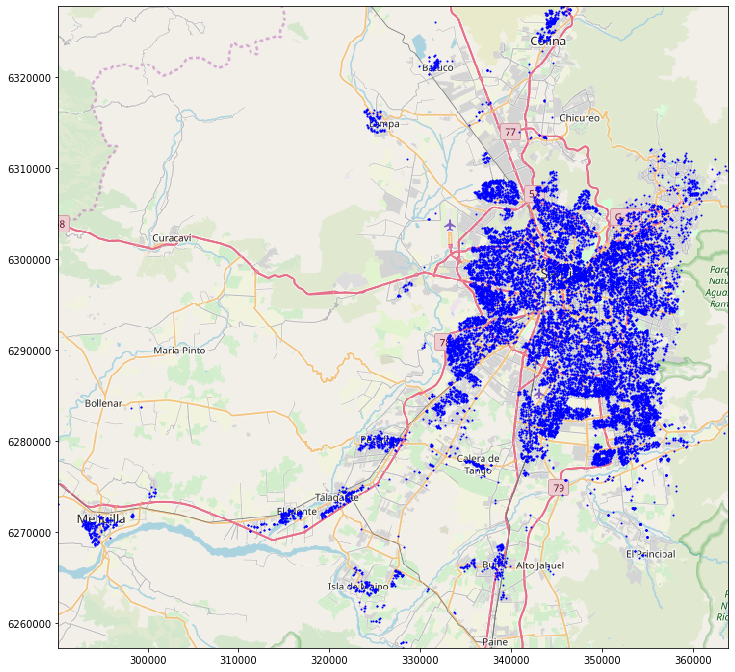

In [372]:
# As seen on https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db

Bound_Box = ((f4.DirCoordX.min(), f4.DirCoordX.max(), f4.DirCoordY.min(), f4.DirCoordY.max()))

Map_San = plt.imread('map.png')
fig, ax = plt.subplots(figsize = (12,15))
ax.scatter(f4.DirCoordX, f4.DirCoordY, zorder=1, alpha= 1, c='b', s=1)
ax.set_xlim(Bound_Box[0],Bound_Box[1])
ax.set_ylim(Bound_Box[2],Bound_Box[3])
ax.imshow(Map_San, zorder=0, extent = Bound_Box, aspect= 'equal')

# Exploratory Analysis

Let's go ahead and check the correlation between the attributes (later down the road, we may also conduct a few feature selection methods):

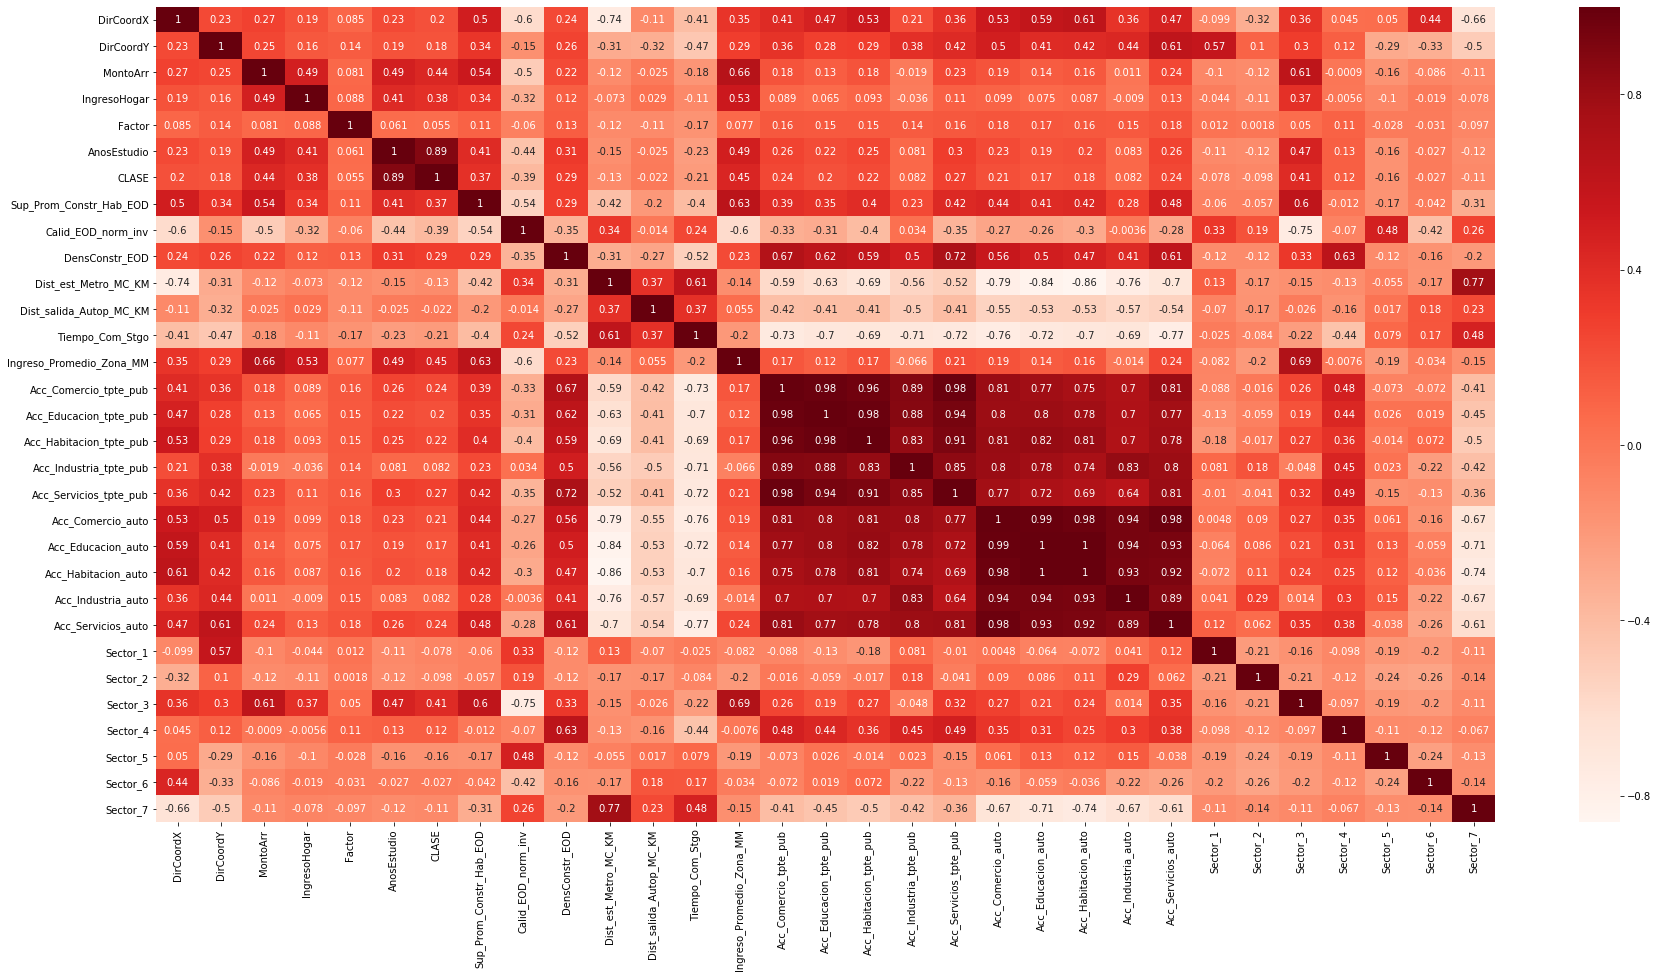

MontoArr                    0.436097
AnosEstudio                 0.889540
CLASE                       1.000000
Ingreso_Promedio_Zona_MM    0.445218
Sector_3                    0.405930
Name: CLASE, dtype: float64


In [373]:
#Using Pearson Correlation
plt.figure(figsize=(30,15))
cor = f4.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#Correlation with output variable
cor_target = abs(cor['CLASE'])

#Printing correlated features above threshold
relevant_features = cor_target[cor_target>0.4]
print(relevant_features)

Now that we also understand how to use the UTM coordinates and, as we can see from the correlation map above, it might be interesting to add some new point in our map, such as distances to specific locations of interest. Let's then select a prestigious hospital/clinic in Santiago (-33.392800, -70.572800), the international airport (-33.401967, -70.794080), a very famous park (-33.430573, -70.636080) and the epicentre of a prestigious neighorborhood (-33.417974, -70.553024):

In [374]:
hosp = utm.from_latlon(-33.392800, -70.572800)
airport = utm.from_latlon(-33.401967, -70.794080)
park = utm.from_latlon(-33.430573, -70.636080)
nhood = utm.from_latlon(-33.417974, -70.553024)

print(hosp, airport, park, nhood)

(353722.7670310453, 6304060.681531794, 19, 'H') (333157.784384334, 6302711.228992855, 19, 'H') (347902.7057640308, 6299781.470015339, 19, 'H') (355603.8674734896, 6301296.923009254, 19, 'H')


Let's now check the euclidean distance between, for example, the hospital and the park:

In [375]:
type(hosp)
Ahosp = np.array(hosp[0:2])
Aairport = np.array(airport[0:2])
Apark = np.array(park[0:2])
Ahood = np.array(nhood[0:2])
print(np.linalg.norm(Apark-Ahosp))

7223.90229407691


Which, remember, is the straight line distance between those places (if you use Google Maps now and check the travel distance between them, it will be closer to 10km.). Not ideal, but it could be a nice indication of upscale areas. So let's add those columns to the dataframe:

In [376]:
# Making the element wise subtraction for every positions X and Y in the DF win relation to each of the
# 4 positions that we picked.
f4['DistHosp'] = np.linalg.norm(f4[['DirCoordX', 'DirCoordY']].sub(Ahosp), axis=1)
f4['DistAirp'] = np.linalg.norm(f4[['DirCoordX', 'DirCoordY']].sub(Aairport), axis=1)
f4['DistPark'] = np.linalg.norm(f4[['DirCoordX', 'DirCoordY']].sub(Apark), axis=1)
f4['DistHood'] = np.linalg.norm(f4[['DirCoordX', 'DirCoordY']].sub(Ahood), axis=1)
f4.describe().T

,count,mean,std,min,25%,50%,75%,max
DirCoordX,17583.0,3.444175e+05,10024.819801,2.901847e+05,3.391365e+05,3.457909e+05,3.514570e+05,3.638298e+05
DirCoordY,17583.0,6.292423e+06,10742.622171,6.257255e+06,6.284944e+06,6.293065e+06,6.299457e+06,6.327817e+06
MontoArr,17583.0,1.870802e+05,158933.394368,1.000000e+04,1.125750e+05,1.500000e+05,2.000000e+05,5.000000e+06
IngresoHogar,17583.0,6.869392e+05,712628.065563,0.000000e+00,3.000000e+05,5.090300e+05,8.420205e+05,1.480000e+07
Factor,17583.0,1.124989e+02,74.394485,5.151379e+00,6.833277e+01,9.450822e+01,1.335757e+02,9.271428e+02
AnosEstudio,17583.0,1.231826e+01,3.225963,4.000000e+00,1.000000e+01,1.200000e+01,1.400000e+01,2.400000e+01
CLASE,17583.0,1.833248e+00,0.727957,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00
Sup_Prom_Constr_Hab_EOD,17583.0,4.972832e+01,22.274025,0.000000e+00,3.910000e+01,4.550000e+01,5.660000e+01,2.073000e+02
Calid_EOD_norm_inv,17583.0,6.499778e-01,0.347248,0.000000e+00,3.600000e-01,7.800000e-01,9.800000e-01,1.000000e+00
DensConstr_EOD,17583.0,3.779364e-01,0.458275,0.000000e+00,1.770000e-01,2.540000e-01,3.540000e-01,4.599000e+00


Great, it all makes sense since the distances are in meters, ranging, for example, from 58m for the closest house to the park, to 63km for the furthest one.

We may now divide the data into train and test sets, and then normalize it:

In [377]:
f4['Test'] = np.where(((f4['DirCoordX'] >= minCoord[0]) & (f4['DirCoordX'] <= maxCoord[0])
                      & (f4['DirCoordY'] >= minCoord[1]) & (f4['DirCoordY'] <= maxCoord[1])), 1, 0)

test = f4[f4['Test'] == 1]
training = f4[f4['Test'] == 0]

training.columns

Index(['DirCoordX', 'DirCoordY', 'MontoArr', 'IngresoHogar', 'Factor',
       'AnosEstudio', 'CLASE', 'Sup_Prom_Constr_Hab_EOD', 'Calid_EOD_norm_inv',
       'DensConstr_EOD', 'Dist_est_Metro_MC_KM', 'Dist_salida_Autop_MC_KM',
       'Tiempo_Com_Stgo', 'Ingreso_Promedio_Zona_MM', 'Acc_Comercio_tpte_pub',
       'Acc_Educacion_tpte_pub', 'Acc_Habitacion_tpte_pub',
       'Acc_Industria_tpte_pub', 'Acc_Servicios_tpte_pub', 'Acc_Comercio_auto',
       'Acc_Educacion_auto', 'Acc_Habitacion_auto', 'Acc_Industria_auto',
       'Acc_Servicios_auto', 'Sector_1', 'Sector_2', 'Sector_3', 'Sector_4',
       'Sector_5', 'Sector_6', 'Sector_7', 'DistHosp', 'DistAirp', 'DistPark',
       'DistHood', 'Test'],
      dtype='object')

In [378]:
# defining x for train and test sets, removing CLASE (Y) and 'test' column

x_train = training[['DirCoordX', 'DirCoordY', 'MontoArr', 'IngresoHogar', 'Factor',
       'AnosEstudio', 'Sup_Prom_Constr_Hab_EOD', 'Calid_EOD_norm_inv',
       'DensConstr_EOD', 'Dist_est_Metro_MC_KM', 'Dist_salida_Autop_MC_KM',
       'Tiempo_Com_Stgo', 'Ingreso_Promedio_Zona_MM', 'Acc_Comercio_tpte_pub',
       'Acc_Educacion_tpte_pub', 'Acc_Habitacion_tpte_pub',
       'Acc_Industria_tpte_pub', 'Acc_Servicios_tpte_pub', 'Acc_Comercio_auto',
       'Acc_Educacion_auto', 'Acc_Habitacion_auto', 'Acc_Industria_auto',
       'Acc_Servicios_auto', 'Sector_1', 'Sector_2', 'Sector_3', 'Sector_4',
       'Sector_5', 'Sector_6', 'Sector_7', 'DistHosp', 'DistAirp', 'DistPark',
       'DistHood']]

x_test = test[['DirCoordX', 'DirCoordY', 'MontoArr', 'IngresoHogar', 'Factor',
       'AnosEstudio', 'Sup_Prom_Constr_Hab_EOD', 'Calid_EOD_norm_inv',
       'DensConstr_EOD', 'Dist_est_Metro_MC_KM', 'Dist_salida_Autop_MC_KM',
       'Tiempo_Com_Stgo', 'Ingreso_Promedio_Zona_MM', 'Acc_Comercio_tpte_pub',
       'Acc_Educacion_tpte_pub', 'Acc_Habitacion_tpte_pub',
       'Acc_Industria_tpte_pub', 'Acc_Servicios_tpte_pub', 'Acc_Comercio_auto',
       'Acc_Educacion_auto', 'Acc_Habitacion_auto', 'Acc_Industria_auto',
       'Acc_Servicios_auto', 'Sector_1', 'Sector_2', 'Sector_3', 'Sector_4',
       'Sector_5', 'Sector_6', 'Sector_7', 'DistHosp', 'DistAirp', 'DistPark',
       'DistHood']]

In [379]:
# Checking train x set
x_train[:5]

,DirCoordX,DirCoordY,MontoArr,IngresoHogar,Factor,AnosEstudio,Sup_Prom_Constr_Hab_EOD,Calid_EOD_norm_inv,DensConstr_EOD,Dist_est_Metro_MC_KM,...,Sector_2,Sector_3,Sector_4,Sector_5,Sector_6,Sector_7,DistHosp,DistAirp,DistPark,DistHood
0,335180.8019,6266420.975,100000,450845,136.393738,11,53.8,0.98,0.059,23.051711,...,0,0,0,0,0,1,41958.932049,36346.597292,35703.913869,40415.756296
1,338410.2114,6265607.141,120000,1019369,73.843597,11,59.6,0.98,0.033,21.080177,...,0,0,0,0,0,1,41390.205839,37474.008797,35468.185926,39615.430694
2,327863.8248,6257800.086,70000,80000,180.722809,10,59.5,0.98,0.004,34.147894,...,0,0,0,0,0,1,52997.430053,45222.082803,46518.741966,51589.580318
3,327864.0000,6257800.000,80000,559259,150.379059,14,59.5,0.98,0.004,34.147817,...,0,0,0,0,0,1,52997.419637,45222.147702,46518.744108,51589.558621
4,338480.8152,6267296.941,117771,710309,122.001518,12,43.6,0.98,0.086,19.908792,...,0,0,0,0,0,1,39798.111934,35812.099228,33823.315141,38068.329301


In [380]:
# Checking test x set
x_test[:5]

,DirCoordX,DirCoordY,MontoArr,IngresoHogar,Factor,AnosEstudio,Sup_Prom_Constr_Hab_EOD,Calid_EOD_norm_inv,DensConstr_EOD,Dist_est_Metro_MC_KM,...,Sector_2,Sector_3,Sector_4,Sector_5,Sector_6,Sector_7,DistHosp,DistAirp,DistPark,DistHood
341,342667.2223,6294083.011,140000,430000,170.084518,15,61.4,0.78,0.312,2.858138,...,1,0,0,0,0,0,14892.245584,12840.387658,7738.392743,14812.066528
342,342663.7673,6294077.454,120000,370000,165.673737,12,61.4,0.78,0.312,2.862792,...,1,0,0,0,0,0,14898.533720,12841.564617,7744.822460,14817.790837
434,342863.3780,6294409.481,150000,300000,168.688889,12,61.4,0.78,0.312,2.596840,...,1,0,0,0,0,0,14528.317240,12771.748791,7365.669711,14482.987587
470,343230.6315,6294060.450,130000,214374,147.810654,6,61.4,0.78,0.312,3.054203,...,1,0,0,0,0,0,14494.465795,13277.734227,7386.362294,14333.998398
1060,343617.9803,6303167.001,170000,830000,68.643501,12,43.3,0.93,0.275,3.625290,...,0,0,0,0,0,0,10144.228890,10470.120664,5460.832569,12130.897866


In [381]:
#Setting the y's

y_train = training['CLASE']
y_test = test['CLASE']

In [382]:
y_train[:10]

0    1
1    1
2    1
3    2
4    2
5    1
6    2
7    1
8    2
9    2
Name: CLASE, dtype: int64

In [383]:
from sklearn import preprocessing
# Normalizing the data

std = preprocessing.StandardScaler().fit(x_train)
x_train_std = std.transform(x_train)
x_test_std = std.transform(x_test)

In [384]:
#and now just copying and pasting code from our notebooks to see if we're onto something here...
lr=LogisticRegression()
lr.fit(xtrain_scaled, y_train)

# make predictions from Logistic regression model
y_pred_lr = lr.predict(x_test_std)

# evaluate quality of predictions
print("Accuracy is %f" % accuracy_score(y_pred_lr, y_test))

rf=RandomForestClassifier(n_estimators=12)
rf.fit(x_train, y_train)
print(rf.score(x_test, y_test))

C:\Users\peger\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\peger\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy is 0.995110
0.9975550122249389
